# Gold Price Prediction

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing

In [3]:
# Loading the csv data to a Panda DataFrame
gold_data = pd.read_csv('gold_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# Statistical Measures of the Data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

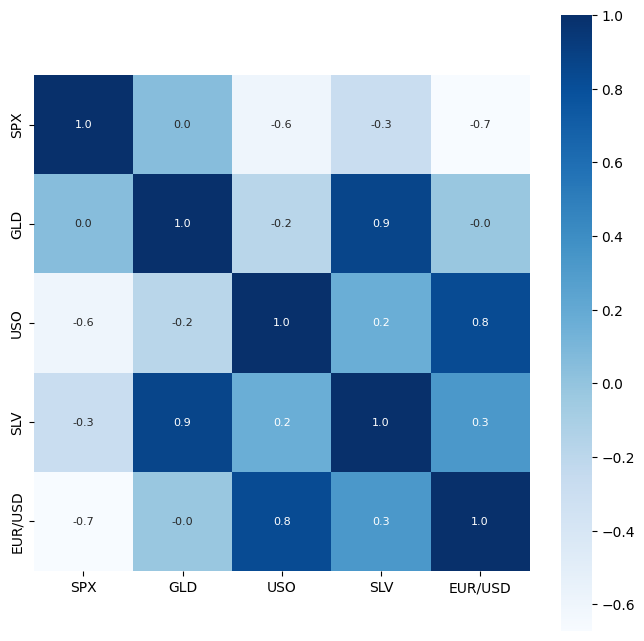

In [11]:
numeric_gold_data = gold_data.select_dtypes(include=[float, int])
correlation = numeric_gold_data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = "Blues")

In [13]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Bhavya\AppData\Local\Temp\ipykernel_7272\2555385925.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

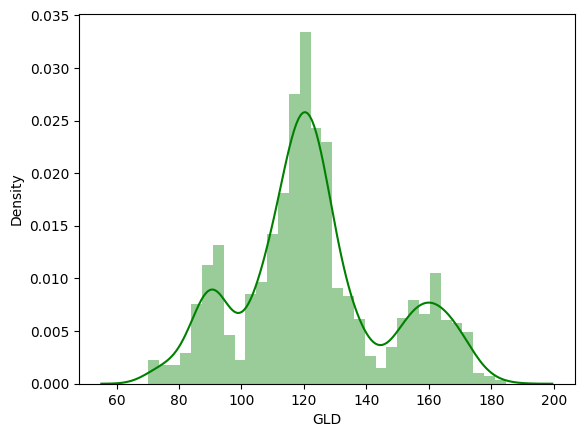

In [14]:
# Checking the gold price distribution
sns.distplot(gold_data['GLD'], color = 'green')

## Splitting the Features and Target

In [15]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
y = gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting into training and testing data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

## Model Training and Evaluation

In [19]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.57519948  82.05699972 116.01230003 127.74870053 120.50150107
 154.73909806 150.17179837 126.15520004 117.46719884 126.07260064
 116.70880065 171.64860087 141.60559894 167.79349864 115.28459991
 117.64090029 140.81860245 170.39110129 159.4677033  162.14709921
 155.17140007 125.34069999 175.66819953 157.46280292 125.3220006
  93.75929954  77.21040006 120.40049983 119.15009956 167.48110041
  88.17270061 125.43509996  91.21850075 117.58920038 121.15269865
 136.68550006 115.41130111 114.52030073 147.76629909 107.18380122
 104.14410253  87.14449808 126.46550077 117.9831     154.92169905
 119.76380018 108.4326     107.91799861  93.24280067 127.09029802
  75.23020027 113.56789916 121.42240011 111.22649906 118.86809877
 120.40509992 159.77990045 168.33420149 147.14099713  85.89289875
  94.36740034  86.84789863  90.54439986 118.94460036 126.44850066
 127.55619981 171.38749997 122.31979912 117.51059915  98.84590055
 168.36300143 142.83339789 132.08520322 121.25100219 120.9913992
 119.8333006

In [22]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.9891287997380205


## Compare actual and predicted values in a plot

In [23]:
y_test = list(y_test)

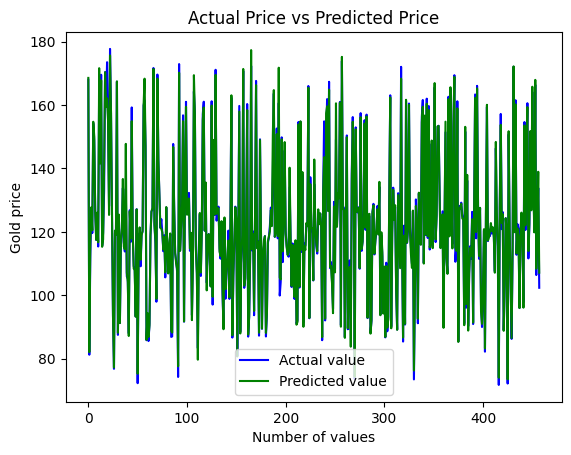

In [24]:
plt.plot(y_test, color = 'blue', label =  'Actual value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel("Gold price")
plt.legend()
plt.show()